In [12]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('IRIS.csv')

In [8]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Remove the target which is specis
TARGET = 'Species'
X = df.copy()
X = X.drop([TARGET], axis = 1)

varNames = X.columns

In [10]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
# Now we must standardize the data for PCA
# We subtract out the mean and divide by the standard deviation and puts everyone on a scale of +/- 3

theScaler = StandardScaler()
theScaler.fit(X)

# Now we need to standardize the data set
X_STD = theScaler.transform(X)
X_STD[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [23]:
# Find the number of variables in the data (1 means the columns, 0 means rows)
MAX_N = X_STD.shape[1]
MAX_N

# Now fit the data by creating 4 PCAs (MAX_N)
pca = PCA(n_components=MAX_N)
pca.fit(X_STD)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# Now lets look at the eigen vectors for each PCA
ev = pca.explained_variance_
print("Eigen Values")
print(ev)
print('\n\n')

Eigen Values
[2.93808505 0.9201649  0.14774182 0.02085386]





In [26]:
varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int (total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append(PCT)
    print( round(i,2), 'variation =', VAR,"%"," total=", PCT,"%")

2.94 variation = 73 %  total= 73 %
0.92 variation = 23 %  total= 96 %
0.15 variation = 3 %  total= 100 %
0.02 variation = 0 %  total= 100 %


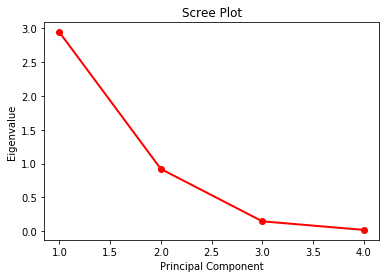

In [31]:
# 1st way to make a scree plot
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, ev, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

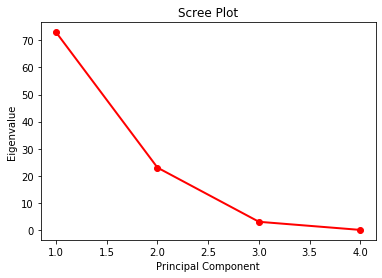

In [34]:
# Second way to make a scree plot
# total 'info' per variable on the y-axis
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, varPCT, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

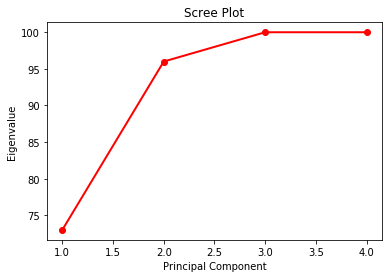

In [35]:
# third way to make a scree plot
# total 'info' per variable on the y-axis
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, totPCT, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [36]:
dfc = pd.DataFrame( pca.components_)
dfc.columns = varNames
dfc

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [41]:
X_PCA = pca.transform( X_STD )
X_PCA = pd.DataFrame(X_PCA)

# Lets drop the last two PCAs because they don't do much
# Give me all the rows, and just keep columns 0 through 1
X_PCA = X_PCA.iloc[:,0:2]


,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [43]:
X_PCA.columns = ['PCA1', 'PCA2']
X_PCA.head()

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [44]:
X_PCA['TARGET'] = df['Species']
X_PCA.head()

,PCA1,PCA2,TARGET
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


In [45]:
for Name, Group in X_PCA.groupby('TARGET'):
    print(Group.head())
    print('\n')

       PCA1      PCA2  TARGET
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa


        PCA1      PCA2      TARGET
50  1.101781  0.862972  versicolor
51  0.731337  0.594615  versicolor
52  1.240979  0.616298  versicolor
53  0.407483 -1.754404  versicolor
54  1.075475 -0.208421  versicolor


         PCA1      PCA2     TARGET
100  1.844569  0.870421  virginica
101  1.157882 -0.698870  virginica
102  2.205267  0.562010  virginica
103  1.440151 -0.046988  virginica
104  1.867812  0.295045  virginica




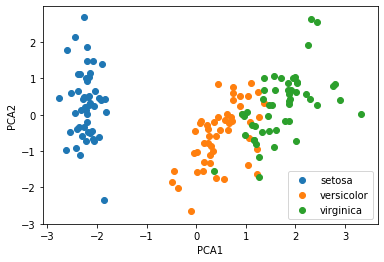

In [46]:
for Name, Group in X_PCA.groupby('TARGET'):
    plt.scatter(Group.PCA1, Group.PCA2, label = Name)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()